In [1]:
'''First things first, let's import the modules/methods we'll probably use so they're easier
to find at a glance:'''

#Data modules
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#scikit-learn imports
import sklearn

#Regressors/Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#Note: the test set does not contain the survival information, so to train better:
from sklearn.model_selection import train_test_split

#evaluating results
from sklearn import metrics

In [2]:
#Now let's import the training/testing data itself:
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

NOTE: Dataset information from kaggle (https://www.kaggle.com/c/titanic/data) 
    
    Pclass: Ticket class. 
    SibSp: #of siblings/spouses aboard the titanic
    Parch: #of parents/children aboard the titanic
    Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [3]:
titanic_train.info()
titanic_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_test.info()
titanic_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


For now my main concern is to see what data 'looks' like. So lets visualize the amounts of passengers that :

    1. belonged to each class: 'Pclass'
    2. were of a certain sex: 'Sex'
    3. were of a certain age: 'Age'
    4. had siblings/spouses on board with them: 'SibSp'
    5. had parents/children on board with them: 'Parch'
    6. were on certain levels of the ship: 'Cabin'
    7. embarked from the different cities: 'Embarked'
    
It looks like making these visualizations will be a lot easier if we just clean the data beforehand. So:

    1. remove the 'Name', 'Ticket', and 'Fare' columns because those don't strike me as being relevant to making predictions
    2. for any 'Cabin' values, drop the Na's and any numbers s.t. we only have the level of the ship for each passenger (the available ones anyway)

In [5]:
# number 1
titanic_train = titanic_train.drop(['Name','Ticket','Fare'], axis=1)

In [6]:
#almost forgot to do the test df
titanic_test = titanic_test.drop(['Name','Ticket','Fare'],axis=1)

In [7]:
titanic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,1,0,3,male,22.0,1,0,NaN,S
1,2,1,1,female,38.0,1,0,C85,C
2,3,1,3,female,26.0,0,0,NaN,S
3,4,1,1,female,35.0,1,0,C123,S
4,5,0,3,male,35.0,0,0,NaN,S


In [8]:
# number 2
copy_df = titanic_train.copy()

In [9]:
type(copy_df['Cabin'][1])

str

In [10]:
#Doing this on a copy first to make sure I'm doing it correctly:
level = []
for each in copy_df['Cabin']:
    if (type(each) == str):
        level.append(each[0])
    else:
        level.append('Z')

In [11]:
level

['Z',
 'C',
 'Z',
 'C',
 'Z',
 'Z',
 'E',
 'Z',
 'Z',
 'Z',
 'G',
 'C',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'D',
 'Z',
 'A',
 'Z',
 'Z',
 'Z',
 'C',
 'Z',
 'Z',
 'Z',
 'B',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'D',
 'Z',
 'B',
 'C',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'B',
 'C',
 'Z',
 'Z',
 'Z',
 'F',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'F',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'C',
 'Z',
 'Z',
 'Z',
 'E',
 'Z',
 'Z',
 'Z',
 'A',
 'D',
 'Z',
 'Z',
 'Z',
 'Z',
 'D',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'C',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'B',
 'Z',
 'Z',
 'Z',
 'Z',
 'E',
 'D',
 'Z',
 'Z',
 'Z',
 'F',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'D',
 'C',
 'Z',
 'B',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'F',
 'Z',
 'Z',
 'C',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'Z',
 'E'

In [12]:
level = Series(level)

In [13]:
type(level)

pandas.core.series.Series

In [14]:
copy_df['cabin'] = level

In [15]:
copy_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,cabin
0,1,0,3,male,22.0,1,0,NaN,S,Z
1,2,1,1,female,38.0,1,0,C85,C,C
2,3,1,3,female,26.0,0,0,NaN,S,Z
3,4,1,1,female,35.0,1,0,C123,S,C
4,5,0,3,male,35.0,0,0,NaN,S,Z


In [16]:
#Now lets fix the actual DataFrames
level_train = []
for each in titanic_train['Cabin']:
    if (type(each) == str):
        level_train.append(each[0])
    else:
        level_train.append('Z')  #Z refers to NaN values!
        
level_train = Series(level_train)
titanic_train['cabin'] = level_train

level_test = []
for each in titanic_test['Cabin']:
    if (type(each) == str):
        level_test.append(each[0])
    else:
        level_test.append('Z') #Z refers to NaN values here too!

level_test = Series(level_test)
titanic_test['cabin'] = level_test

NOTE: I have no idea if the cabin numbers have any effect on survival rate. Room numbers tend to have the same physical layout in most buildings I've been in, so maybe the titanic had the a similar feature. Certain areas of each floor may have been affected more harshly/easier to get out of so we can check that out later! 

In [17]:
#Lets check it out to make sure we did this correctly again:
titanic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,cabin
0,1,0,3,male,22.0,1,0,NaN,S,Z
1,2,1,1,female,38.0,1,0,C85,C,C
2,3,1,3,female,26.0,0,0,NaN,S,Z
3,4,1,1,female,35.0,1,0,C123,S,C
4,5,0,3,male,35.0,0,0,NaN,S,Z


In [18]:
titanic_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,cabin
0,892,3,male,34.5,0,0,NaN,Q,Z
1,893,3,female,47.0,1,0,NaN,S,Z
2,894,2,male,62.0,0,0,NaN,Q,Z
3,895,3,male,27.0,0,0,NaN,S,Z
4,896,3,female,22.0,1,1,NaN,S,Z


In [19]:
#Now lets get rid of the 'Cabin' column since we now have a cleaner version in the DFs 
titanic_train.drop('Cabin',axis=1,inplace=True)
titanic_test.drop('Cabin',axis=1,inplace=True)

In [20]:
#One last check before our visualizations
titanic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,cabin
0,1,0,3,male,22.0,1,0,S,Z
1,2,1,1,female,38.0,1,0,C,C
2,3,1,3,female,26.0,0,0,S,Z
3,4,1,1,female,35.0,1,0,S,C
4,5,0,3,male,35.0,0,0,S,Z


In [21]:
titanic_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,cabin
0,892,3,male,34.5,0,0,Q,Z
1,893,3,female,47.0,1,0,S,Z
2,894,2,male,62.0,0,0,Q,Z
3,895,3,male,27.0,0,0,S,Z
4,896,3,female,22.0,1,1,S,Z


Let's bring my visualizations list down here so it's easier to find. For now my main concern is to see what data 'looks' like. So lets visualize the amounts of passengers that :

    1. belonged to each class 'Pclass'
    2. were of a certain sex: 'Sex'
    3. were of a certain age range: 'Age'
    4. had siblings/spouses on board with them: 'SibSp'
    5. had parents/children on board with them: 'Parch'
    6. embarked from the different cities: 'Embarked'
    7. were on certain levels of the ship: 'cabin'
    
Aditionally, let's see how many survived from each of these features

In [22]:
#grabbing the column names before we write a loop to make plots for us
titanic_columns = titanic_train.columns
titanic_columns = titanic_columns[2:]
titanic_columns = list(titanic_columns)
titanic_columns.remove('Age')
titanic_columns

['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'cabin']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD91FED048>]], dtype=object)

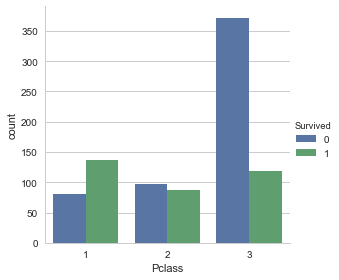

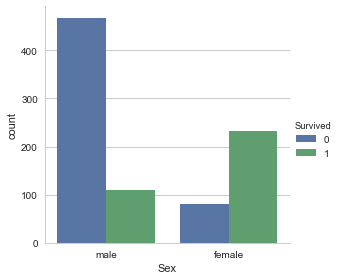

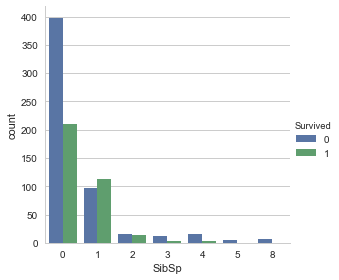

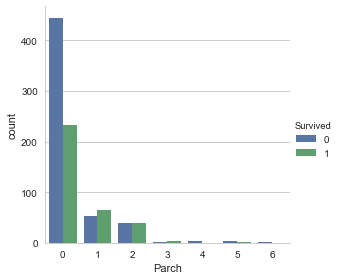

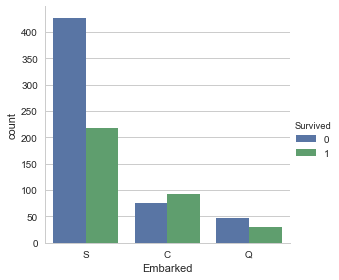

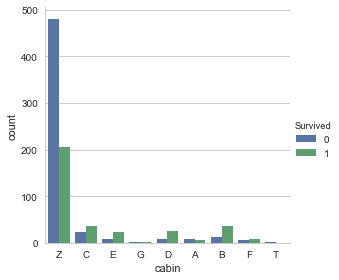

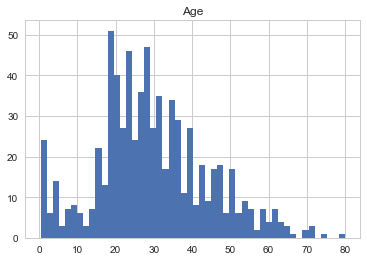

In [23]:
#1,2,4,5,6,7
for each in titanic_columns:
    sns.factorplot(x=each,data=titanic_train,kind='count',hue='Survived')
    
#3 (using .hist b/c why would we want to know counts of each age?)
titanic_train.hist(column='Age',bins=50)

Original way I did it:
#1
sns.factorplot(x='Pclass',data=titanic_train,kind='count', hue='Survived')

#2
sns.factorplot(x='Sex',data=titanic_train,kind='count', hue='Survived')

#3 (using .hist b/c why would we want to know counts of each age?)
titanic_train.hist(column='Age',bins=50)

#4
sns.factorplot(x='SibSp',data=titanic_train,kind='count', hue='Survived')

#5
sns.factorplot(x='Parch',data=titanic_train,kind='count', hue='Survived')

#6
sns.factorplot(x='cabin',data=titanic_train,kind='count', hue='Survived')

#7
sns.factorplot(x='Embarked',data=titanic_train,kind='count', hue='Survived')


Plot Notes: (in order of graphs, but indexed in the order columns are)
    
    1. First class passengers were most likely to survive while third class passengers were least likely to survive which makes perfect sense. Many of the third class passengers may have been males too(workers and the like)
    
    2. Women were considerably more likely to survive than men. WHAT ABOUT THE CHILDREN?!
  
    4. Having a sibling/spouse seems to be indicative of a lower survival rate. BUT, SibSp=1 looks like it gave passengers a higher rate of survival. Is this because having a spouse on board gave people a higher chance of living?

    5. Having 1 parent or child aboard seems to be indicative of a lower survival rate. BUT, Parch=1 looks like it gave passengers a higher survival rate. Is this because a single pair of male_parent+child was easier to put on a boat? Especially since the order of safety-boat boardings was children, women, men.
    
    6. Climbing aboard the titanic at Cherbourg gave those passengers a higher rate of survival for some reason. Maybe there were more children/women/higher class people in that city. Or, in the other two cities, groups of people came aboard together rather than apart. Or both. 
    
    7. For some reason it looks like if the passenger knew his/her cabin number, there was a higher rate of survival. There's probably a concrete reason for this but it might have to do with...I seriously have no idea. Having your ticket on you? Being of higher class? 
    
    3. Average age seems to be mid to late 20's. 

Plots to look into further:

    i. #2 change to men vs. women vs. children 
    ii. #4 and #5 SibSp and Parch look like they have almost the same exact pattern. Lets combine those
    iii. #7 remove the 'Z'(NaN) values from the graph so actual values are clearer

In [24]:
#2 make the 'person' column to do this
def male_female_child(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex
    
titanic_train['person'] = titanic_train[['Age','Sex']].apply(male_female_child, axis = 1)
titanic_test['person'] = titanic_test[['Age','Sex']].apply(male_female_child,axis=1)

#Check if what we did was correct
titanic_train.head(n=15)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,cabin,person
0,1,0,3,male,22.0,1,0,S,Z,male
1,2,1,1,female,38.0,1,0,C,C,female
2,3,1,3,female,26.0,0,0,S,Z,female
3,4,1,1,female,35.0,1,0,S,C,female
4,5,0,3,male,35.0,0,0,S,Z,male
5,6,0,3,male,NaN,0,0,Q,Z,male
6,7,0,1,male,54.0,0,0,S,E,male
7,8,0,3,male,2.0,3,1,S,Z,child
8,9,1,3,female,27.0,0,2,S,Z,female
9,10,1,2,female,14.0,1,0,C,Z,child


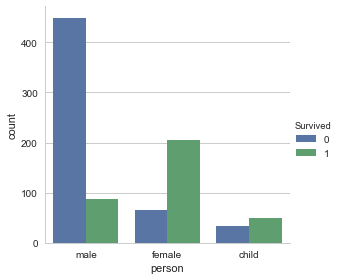

In [25]:
#visualize the new #2 plot:
sns.factorplot('person',data=titanic_train,kind='count',hue='Survived')

In [26]:
#combine SibSp and Parch
titanic_train['family'] = titanic_train.SibSp + titanic_train.Parch
titanic_train.head(15)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,cabin,person,family
0,1,0,3,male,22.0,1,0,S,Z,male,1
1,2,1,1,female,38.0,1,0,C,C,female,1
2,3,1,3,female,26.0,0,0,S,Z,female,0
3,4,1,1,female,35.0,1,0,S,C,female,1
4,5,0,3,male,35.0,0,0,S,Z,male,0
5,6,0,3,male,NaN,0,0,Q,Z,male,0
6,7,0,1,male,54.0,0,0,S,E,male,0
7,8,0,3,male,2.0,3,1,S,Z,child,4
8,9,1,3,female,27.0,0,2,S,Z,female,2
9,10,1,2,female,14.0,1,0,C,Z,child,1


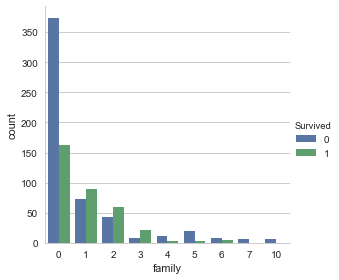

In [27]:
#4/ #5 revised plot
sns.factorplot(x='family', hue='Survived',data=titanic_train,kind='count')

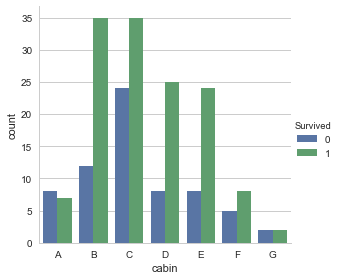

In [28]:
#7, with Z(NaN) values removed
sns.factorplot(x='cabin', hue = 'Survived', data = titanic_train, kind = 'count',
               order = ['A','B','C','D','E','F','G'])

The revised #7 plot above really only suggests exactly what I thought earlier, which is that a passenger knowing their cabin number(remember 'Cabin' only included values that had the cabin level and number) or the people who wrote these values down knowing a passenger's cabin number was an indicator of the passenger surviving, but I doubt it was causal.

REFORMATTING DATA

Before we make any predictions, let's take another look at our DataFrames:

In [29]:
titanic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,cabin,person,family
0,1,0,3,male,22.0,1,0,S,Z,male,1
1,2,1,1,female,38.0,1,0,C,C,female,1
2,3,1,3,female,26.0,0,0,S,Z,female,0
3,4,1,1,female,35.0,1,0,S,C,female,1
4,5,0,3,male,35.0,0,0,S,Z,male,0


In [30]:
titanic_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,cabin,person
0,892,3,male,34.5,0,0,Q,Z,male
1,893,3,female,47.0,1,0,S,Z,female
2,894,2,male,62.0,0,0,Q,Z,male
3,895,3,male,27.0,0,0,S,Z,male
4,896,3,female,22.0,1,1,S,Z,female


It'll be fun to explore the Embarked column later(not in the notebook, IRL), but for now lets remove it because this isn't an RPG and noone received +5 Luck from the city they embarked:

In [31]:
titanic_train.drop('Embarked',axis=1,inplace=True)
titanic_test.drop('Embarked',axis=1,inplace=True)

The most obvious problem here is the fact that we have two sex-describing columns. Let's get rid of the 'person' columns. Even though I thought it would have an impact on my predictions, child survival rates are near ~50/~50. remove them:

In [32]:
titanic_train.drop('person',axis=1,inplace=True)
titanic_test.drop('person',axis=1,inplace=True)

The next thing is that SibSp and Parch had a similar pattern (feature=1 indicated highest chance of survival). I combined them thinking the values would be better contained in one column but that makes no sense. Having just 1 sibling or your spouse on the ship with you could give you the upper hand in terms of surviving just like having 1 parent/child on the ship with you would (as opposed to 0 for both features, or more than 1 for parent/child). So let's remove the 'family' column from the training data:

In [33]:
titanic_train.drop('family',axis=1, inplace=True)

Now let's drop the 'cabin' column since the majority of the rows don't have information on it. The passenger knowing his/her cabin number didn't give the passenger +5 luck or anything. By that I mean most people clearly didn't know their cabin number/it wasn't written down at least. Let's remove it:

In [34]:
titanic_train.drop('cabin',axis=1,inplace=True)
titanic_test.drop('cabin',axis=1,inplace=True)

In [35]:
#Another look at our DataFrames:
titanic_test.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,34.5,0,0
1,893,3,female,47.0,1,0
2,894,2,male,62.0,0,0
3,895,3,male,27.0,0,0
4,896,3,female,22.0,1,1
5,897,3,male,14.0,0,0
6,898,3,female,30.0,0,0
7,899,2,male,26.0,1,1
8,900,3,female,18.0,0,0
9,901,3,male,21.0,2,0


The last column to drop is 'PassengerId' as the index basically serves as the Id anyway:

In [36]:
titanic_train.drop('PassengerId',axis=1,inplace=True)
titanic_test.drop('PassengerId',axis=1,inplace=True)

There are 4 categorical variables here[Pclass, Sex, SibSp, and Parch], so we need to properly define those in the DataFrame for use with our classifiers:

In [37]:
#pd.getdummies, then name the columns 
Pclass_train_dummies = pd.get_dummies(titanic_train['Pclass'])
Pclass_test_dummies = pd.get_dummies(titanic_test['Pclass'])

#Let's look at the columns so we can properly name them:
Pclass_train_dummies.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [38]:
#Name columns for clarity 
Pclass_train_dummies.columns = ['Pclass1','Pclass2','Pclass3']
Pclass_test_dummies.columns = ['Pclass1','Pclass2','Pclass3']


In [39]:
#Same thing for Sex
Sex_train_dummies = pd.get_dummies(titanic_train['Sex'])
Sex_test_dummies = pd.get_dummies(titanic_test['Sex'])

#Look at columns so we can properly name them:
Sex_train_dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


Alright sweet we don't have to

In [40]:
#Do the same for SibSp
SibSp_train_dummies = pd.get_dummies(titanic_train['SibSp'])
SibSp_test_dummies = pd.get_dummies(titanic_test['SibSp'])

#peek
SibSp_train_dummies.head(10)

,0,1,2,3,4,5,8
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0
5,1,0,0,0,0,0,0
6,1,0,0,0,0,0,0
7,0,0,0,1,0,0,0
8,1,0,0,0,0,0,0
9,0,1,0,0,0,0,0


Why aren't there columns for 6 or 7? After some research, I've found out that I have absolutely no clue why there are only those columns. So here's whats gonna happen. I think it is definitely significant for survival if it was just a passenger and his/her spouse or a passenger and his/her 1 child. A young or old couple, a woman or maybe even a man with just a small child may have been let on the safety boats before single people. We are keeping the 0 column, the 1 column, and combining the others into a 'more than 1' column.

In [41]:
#make the new column
for each in [SibSp_test_dummies, SibSp_train_dummies]:
    each['SibSp 1+'] = each[2] + each[3] + each[4] + each[5] + each[8]

In [42]:
#Drop the old columns
SibSp_test_dummies.drop([2,3,4,5,8], axis=1,inplace=True)
SibSp_train_dummies.drop([2,3,4,5,8],axis=1,inplace=True)

In [43]:
#Name the columns for clarity!!
for each in [SibSp_test_dummies,SibSp_train_dummies]:
    each.columns = ['SibSp 0','SibSp 1','SibSp 1+']

In [44]:
SibSp_test_dummies.head()

,SibSp 0,SibSp 1,SibSp 1+
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0


In [45]:
#Do the same for Parch
Parch_train_dummies = pd.get_dummies(titanic_train['Parch'])
Parch_test_dummies = pd.get_dummies(titanic_test['Parch'])

In [46]:
#Let's check it out:
Parch_train_dummies

,0,1,2,3,4,5,6
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
5,1,0,0,0,0,0,0
6,1,0,0,0,0,0,0
7,0,1,0,0,0,0,0
8,0,0,1,0,0,0,0
9,1,0,0,0,0,0,0


So we'll do the same thing as we did for the SibSp columns:

In [47]:
for each in [Parch_train_dummies,Parch_test_dummies]:
    each['Parch 1+'] = each[2] + each[3] + each[4] + each[5] + each[6]

In [48]:
Parch_train_dummies.head()

,0,1,2,3,4,5,6,Parch 1+
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [49]:
#drop the old columns
for each in [Parch_train_dummies,Parch_test_dummies]:
    each.drop([2,3,4,5,6],axis=1,inplace=True)

In [50]:
Parch_test_dummies.head()

,0,1,9,Parch 1+
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,1,0,0


In [51]:
#Fix the test column:
Parch_test_dummies['Parch 1+'] = Parch_test_dummies['Parch 1+'] + Parch_test_dummies[9]

In [52]:
Parch_test_dummies.drop(9,axis=1,inplace=True)
Parch_test_dummies.head()

,0,1,Parch 1+
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0


In [53]:
#name the columns for clarity:
for each in [Parch_train_dummies,Parch_test_dummies]:
    each.columns = ['Parch 0','Parch 1','Parch 1+']

In [54]:
Parch_train_dummies.head()

,Parch 0,Parch 1,Parch 1+
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [55]:
Parch_test_dummies.head()

,Parch 0,Parch 1,Parch 1+
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0


The last thing we need to do to set up our DataFrames for predictions is to set a reference column for each of the categorical variables. We'll take the last column from each variable to keep it standard. Our 4 variables are [Pclass, Sex, SibSp, Parch].

NOTE: deleting the last column from our SibSp and Parch DataFrames lets us not have to worry about the unaccounted-for columns in the respective DataFrames. 0 and 1 were accounted for in each of the DataFrames, so gg no re scrubs. 

In [56]:
for each in [Pclass_train_dummies,Pclass_test_dummies]:
    each.drop('Pclass3',axis=1,inplace=True)

In [57]:
Pclass_train_dummies.head()

,Pclass1,Pclass2
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0


In [58]:
Pclass_test_dummies.head()

,Pclass1,Pclass2
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0


In [59]:
for each in [Sex_train_dummies,Sex_test_dummies]:
    each.drop('male',axis=1,inplace=True)

In [60]:
Sex_train_dummies.head()

,female
0,0
1,1
2,1
3,1
4,0


In [61]:
Sex_test_dummies.head()

,female
0,0
1,1
2,0
3,0
4,1


In [62]:
for each in [SibSp_train_dummies,SibSp_test_dummies]:
    each.drop('SibSp 1+',axis=1,inplace=True)

In [63]:
SibSp_train_dummies.head()

,SibSp 0,SibSp 1
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0


In [64]:
SibSp_test_dummies.head()

,SibSp 0,SibSp 1
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


In [65]:
for each in [Parch_train_dummies,Parch_test_dummies]:
    each.drop('Parch 1+',axis=1,inplace=True)

In [66]:
Parch_train_dummies.head()

,Parch 0,Parch 1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [67]:
Parch_test_dummies.head()

,Parch 0,Parch 1
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


FINALLY, let's combine the dataframes into one cohesive whole and move on to our predictions!

In [68]:
titanic_train.info()
print('\n')
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.8+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
Pclass    418 non-null int64
Sex       418 non-null object
Age       332 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 16.4+ KB


NOTE: Check it, the only non-categorical variable in these DF's is 'Age'. I feel like it would be more beneficial to change that into a categorical variable as well ['child','young adult','middle age','elderly'], because I doubt anyone was like 'O ur 59? No boat 4 u sux hurr hurr hurr ur not exactly old just yet'. But let's leave that for later just to see what happens with a continous variable.

In [69]:
#Remove the categorical variables from the training and testing dataframes:
for each in [titanic_train,titanic_test]:
    each.drop(['Pclass','Sex','SibSp','Parch'],axis=1,inplace=True)

In [70]:
titanic_train.info()
print('\n')
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
Survived    891 non-null int64
Age         714 non-null float64
dtypes: float64(1), int64(1)
memory usage: 14.0 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 1 columns):
Age    332 non-null float64
dtypes: float64(1)
memory usage: 3.3 KB


So here's a problem I didn't even see before: the 'Age' columns have missing values. Bah. Lets fill in those NaN values with random values based on the existing age distributions:

In [71]:
# get average, std, and number of NaN values in titanic_df
Age_avg_train   = titanic_train['Age'].mean()
Age_std_train       = titanic_train['Age'].std()
Age_nancount_train = titanic_train['Age'].isnull().sum()

# get average, std, and number of NaN values in test_df
Age_avg_test   = titanic_test['Age'].mean()
Age_std_test       = titanic_test['Age'].std()
Age_nancount_test = titanic_test['Age'].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(Age_avg_train- Age_std_train, Age_avg_train+ Age_std_train, size = Age_nancount_train)
rand_2 = np.random.randint(Age_avg_test- Age_std_test, Age_avg_test+ Age_std_test, size = Age_nancount_test)

# fill NaN values in Age column with random values generated
titanic_train['Age'][np.isnan(titanic_train['Age'])] = rand_1
titanic_test['Age'][np.isnan(titanic_test['Age'])] = rand_2

C:\Users\Sidna\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [72]:
#Lets check to make sure we're cool
nancount_train_check = titanic_train['Age'].isnull().sum()
nancount_test_check = titanic_test['Age'].isnull().sum()

print(nancount_train_check)
print('\n')
print(nancount_test_check)

0


0


Awesome possum lets finish the data reformatting part of this project:

In [73]:
titanic_train = pd.concat([titanic_train,Pclass_train_dummies,Sex_train_dummies,SibSp_train_dummies,Parch_train_dummies],axis=1)
titanic_test = pd.concat([titanic_test,Pclass_test_dummies,Sex_test_dummies,SibSp_test_dummies,Parch_test_dummies],axis=1)

In [74]:
titanic_train.head()

,Survived,Age,Pclass1,Pclass2,female,SibSp 0,SibSp 1,Parch 0,Parch 1
0,0,22.0,0,0,0,0,1,1,0
1,1,38.0,1,0,1,0,1,1,0
2,1,26.0,0,0,1,1,0,1,0
3,1,35.0,1,0,1,0,1,1,0
4,0,35.0,0,0,0,1,0,1,0


In [75]:
titanic_test.head()

,Age,Pclass1,Pclass2,female,SibSp 0,SibSp 1,Parch 0,Parch 1
0,34.5,0,0,0,1,0,1,0
1,47.0,0,0,1,0,1,1,0
2,62.0,0,1,0,1,0,1,0
3,27.0,0,0,0,1,0,1,0
4,22.0,0,0,1,0,1,0,1


ALRIGHTY RIGHT RIGHT, NOW WE ARE READY FOR PREDICTION!!! :

    1. Logistic Classification
    2. kNN classification
    3. SVM classification (4 types)
    4. Random Forests classification
    5. Naive Bayes classification

In [100]:
#Create X_train,X_test,Y_train_,Y_test for the training DataFrame:
X_train,X_test,Y_train,Y_test = train_test_split(titanic_train.drop(['Survived'], axis=1),
                                                 titanic_train['Survived'])

LOGISTIC CLASSIFICATION

In [77]:
#Creates a logistic regression class object
logit_model = LogisticRegression()

#Train the model with the training set
logit_model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [78]:
#Predict the classes of the testing data set:
Y_pred = logit_model.predict(X_test)

#Compare the predicted classes to the actual test classes
print (metrics.accuracy_score(Y_test, Y_pred))

0.77130044843


ACCURACY MEASURE: EXTREMELY variable. Running the last 3 cells returns an accuracy of anything from 71%-83% after just 7 runs. I'm thinking changing age to a categorical variable might be a good idea

k NEAREST NEIGHBORS CLASSIFICATION

NOTE: For kNN classification, I don't know what the best k is going to be, but I do know 1 isn't a good idea. Taking the simple nearest neighbor seems a bit superficial. Any even numbers are useless as well, because if we do k=2 and one of the neighbors survived while the other didn't we have a problem. It's less likely for an even # of survivors and non-survivors for all n%2=0 values, but it could happen. It also shouldn't be too high of a number because having a large number of neighbors to base the prediction off will take us out of any context. Let's go based off of that:

In [79]:
#Let's make the range 1 to 19 to see the above in action:
k_range = range(1, 19)

# Set an empty list
accuracy = []

# perform kNN classification for each k in k_range
for k in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, Y_train)
    Y_pred = knn_model.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))

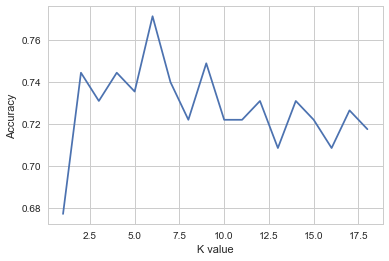

In [80]:
#Plot for visualization:
plt.plot(k_range, accuracy)
plt.xlabel('K value')
plt.ylabel('Accuracy')

ACCURACY MEASURE: While one of these seems to be the best measure for this train/test split, peak accuracy has ranged between 74% and 82% for other splits of training and testing sets. The only reason I can think of such a high variability is because of the age column, again.

SUPPORT VECTOR MACHINES

The non-linear SVM classifications are what I have the least grasp on. So I don't think I'll be able to comment much on these at all. Anyway, let's make predictions:

In [81]:
#SVM regularization parameter
C = 1.0

#SVC Linear
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train,Y_train)
Y_pred = lin_svc.predict(X_test)
print (metrics.accuracy_score(Y_test, Y_pred))

0.780269058296


In [82]:
#SVC with a linear kernel
svc = svm.SVC(kernel='linear',C=C)
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
print (metrics.accuracy_score(Y_test, Y_pred))

0.7533632287


In [83]:
#Gaussian Radial Basis Function:
'''rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C)
rbf_svc.fit(X_train,Y_train)
Y_pred = rbf_svc.predict(X_test)
print (metrics.accuracy_score(Y_test, Y_pred))'''

"rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C)\nrbf_svc.fit(X_train,Y_train)\nY_pred = rbf_svc.predict(X_test)\nprint (metrics.accuracy_score(Y_test, Y_pred))"

In [84]:
#SVC with 3rd degree polynomial
'''poly_svc = svm.SVC(kernel='poly', degree=3,C=C)
poly_svc.fit(X_train,Y_train)
Y_pred = poly_svc.predict(X_test)
print (metrics.accuracy_score(Y_test, Y_pred))'''

"poly_svc = svm.SVC(kernel='poly', degree=3,C=C)\npoly_svc.fit(X_train,Y_train)\nY_pred = poly_svc.predict(X_test)\nprint (metrics.accuracy_score(Y_test, Y_pred))"

ACCURACY MEASURE: Well, either my computer can't handle it, or there's something wrong with using Gaussian/Polynomial kernels for this dataset. Not sure, but I think that's outside the scope of what I'm trying to learn in this project anyway.

GAUSSIAN NAIVE BAYES

Everything~is~independeeennttt~~~ so spooooooookyyyyyyyy:

In [85]:
nb_model = GaussianNB()
nb_model.fit(X_train,Y_train)
Y_pred = nb_model.predict(X_test)
print (metrics.accuracy_score(Y_test, Y_pred))

0.699551569507


ACCURACY MEASURE: After a few runs, I get between 68% and 75% prediction accuracy with this. Still thinking Age should be turned into a categorical variable

DECISION TREES/RANDOM FORESTS

In [102]:
forest_model = RandomForestClassifier()
forest_model.fit(X_train,Y_train)
Y_pred = forest_model.predict(X_test)
print (metrics.accuracy_score(Y_test, Y_pred))

0.775784753363


Maybe these prediction values are all super low because I'm only using a fraction of the datapoints given in the training set...That could be a problem. I'll figure this out tomorrow.

In [87]:
titanic_train.head()

,Survived,Age,Pclass1,Pclass2,female,SibSp 0,SibSp 1,Parch 0,Parch 1
0,0,22.0,0,0,0,0,1,1,0
1,1,38.0,1,0,1,0,1,1,0
2,1,26.0,0,0,1,1,0,1,0
3,1,35.0,1,0,1,0,1,1,0
4,0,35.0,0,0,0,1,0,1,0


In [88]:
titanic_test.head()

,Age,Pclass1,Pclass2,female,SibSp 0,SibSp 1,Parch 0,Parch 1
0,34.5,0,0,0,1,0,1,0
1,47.0,0,0,1,0,1,1,0
2,62.0,0,1,0,1,0,1,0
3,27.0,0,0,0,1,0,1,0
4,22.0,0,0,1,0,1,0,1


In [103]:
#Now to make the predictions for Kaggle!
X_train_kaggle = titanic_train.drop(['Survived'], axis=1)
Y_train_kaggle = titanic_train['Survived']

In [129]:
forest_modelb = RandomForestClassifier()
forest_modelb.fit(X_train_kaggle,Y_train_kaggle)
Y_pred = forest_modelb.predict(X_train_kaggle)
print (metrics.accuracy_score(Y_train_kaggle, Y_pred))

0.904601571268


In [104]:
forest_kaggle_model = RandomForestClassifier()
forest_kaggle_model.fit(X_train_kaggle,Y_train_kaggle)
Y_pred = forest_model.predict(titanic_test)

In [109]:
type(Y_pred)

numpy.ndarray

In [120]:
prediction_df = DataFrame(Y_pred)

In [121]:
prediction_df.columns=['Survived']

In [122]:
prediction_df.head()

,Survived
0,0
1,0
2,1
3,1
4,0


In [123]:
titanic_kaggle_test = pd.read_csv('test.csv')
titanic_kaggle_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [124]:
prediction_df = pd.concat([titanic_kaggle_test['PassengerId'],prediction_df],axis=1)

In [125]:
prediction_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0


In [128]:
#Write the predictions to our predictions csv:
prediction_df.to_csv('predictions.csv')